<a href="https://colab.research.google.com/github/NII-CODES/Twitter-Scrape-Practice/blob/main/scrapetrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install packages

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
from os import path
import pandas as pd
from datetime import date
import itertools
import snscrape.modules.twitter as sntwitter

# **Data Gathering**

In [ ]:
from_date = '2022-12-4'
end_date = '2023-01-19'
search_term = 'debt exchange, bonds' 
loc = ' 5.58701,-0.20363, 10km'

In [ ]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size
print('Number of Tweets : '+str(counter))

Number of Tweets : 519


In [ ]:
max_results = 600

In [ ]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

(0, "'Does Ken Ofori-atta own any bonds? Has he signed the voluntary debt exchange agreement?\\nWhat about the President and his appointees? https://t.co/wVddKGvo1S'")
(1, "220/268\\n\\nI'm under no illusion as to what I'm buying here. This is like buying distressed junk bond debt.\\n\\nBut with FTX gone and more exchanges bending to block access to perps and even tokens for local users, someone gets to soak up that volume.")
(2, "'Has ken ofori-atta sign his voluntary debt exchange agreement or he does not own and bonds? https://t.co/wVddKGvo1S'")
(3, "'Debt Exchange Programme:\\nMany of those that earn the lower half are not people who are necessarily able to save much or invest. It is only a small fraction that is able to save and buy these government bonds. - Dr Theo Acheampong")
(4, '\'@jcoopdeville @kylenabecker @iLoveJaneAdams No I didn\\\'t. I am speaking of the practical value of money. You can\\\'t exchange dollars for "debt" at a reserve bank')
(5, "'Currently ongoing is a c

In [ ]:
df.columns

Index(['content'], dtype='object')

In [ ]:
df['content']

0      'Does Ken Ofori-atta own any bonds? Has he sig...
1      220/268\n\nI'm under no illusion as to what I'...
2      'Has ken ofori-atta sign his voluntary debt ex...
3      'Debt Exchange Programme:\nMany of those that ...
4      '@jcoopdeville @kylenabecker @iLoveJaneAdams N...
                             ...                        
514    'Ghana is launching a domestic debt exchange t...
515    Finance Minister on Ghana's Economy Debt Excha...
516    Ghana's Domestic Debt Exchange Program \n\nKey...
517    'GHANA FINANCE MINISTER: INDIVIDUAL HOLDERS OF...
518    'Big announcement tomorrow. What is this Debt ...
Name: content, Length: 519, dtype: object

In [ ]:
from wordcloud.wordcloud import matplotlib
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import pandas as pd
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

# **Data Preprocessing**

# Remove @ symbol

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*") 
df.head(10)

,content,tidy_tweet
0,'Does Ken Ofori-atta own any bonds? Has he sig...,'Does Ken Ofori-atta own any bonds? Has he sig...
1,220/268\n\nI'm under no illusion as to what I'...,220/268\n\nI'm under no illusion as to what I'...
2,'Has ken ofori-atta sign his voluntary debt ex...,'Has ken ofori-atta sign his voluntary debt ex...
3,'Debt Exchange Programme:\nMany of those that ...,'Debt Exchange Programme:\nMany of those that ...
4,'@jcoopdeville @kylenabecker @iLoveJaneAdams N...,' No I didn\'t. I am speaking of the practic...
5,'Currently ongoing is a crucial meeting betwee...,'Currently ongoing is a crucial meeting betwee...
6,'The individual bond holders make up some 14 p...,'The individual bond holders make up some 14 p...
7,'Bondholders are safer holding on to their cur...,'Bondholders are safer holding on to their cur...
8,'@FAnnohDompreh Hon.,' Hon.
9,'Explore the possibility of exempting individu...,'Explore the possibility of exempting individu...


# Removing special symbols and punctuations

In [ ]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
df.head(10)

,content,tidy_tweet
0,'Does Ken Ofori-atta own any bonds? Has he sig...,Does Ken Ofori atta own any bonds Has he sig...
1,220/268\n\nI'm under no illusion as to what I'...,n nI m under no illusion as to what I ...
2,'Has ken ofori-atta sign his voluntary debt ex...,Has ken ofori atta sign his voluntary debt ex...
3,'Debt Exchange Programme:\nMany of those that ...,Debt Exchange Programme nMany of those that ...
4,'@jcoopdeville @kylenabecker @iLoveJaneAdams N...,No I didn t I am speaking of the practic...
5,'Currently ongoing is a crucial meeting betwee...,Currently ongoing is a crucial meeting betwee...
6,'The individual bond holders make up some 14 p...,The individual bond holders make up some p...
7,'Bondholders are safer holding on to their cur...,Bondholders are safer holding on to their cur...
8,'@FAnnohDompreh Hon.,Hon
9,'Explore the possibility of exempting individu...,Explore the possibility of exempting individu...


# Removing short words

In [ ]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Normalization

In [ ]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())  #tokenizing 
tokenized_tweet.head()

0    [Does, Ofori, atta, bonds, signed, voluntary, ...
1    [under, illusion, what, buying, here, This, li...
2    [ofori, atta, sign, voluntary, debt, exchange,...
3    [Debt, Exchange, Programme, nMany, those, that...
4    [didn, speaking, practical, value, money, exch...
Name: tidy_tweet, dtype: object

In [ ]:
#   Import the Porter stemmer from the nltk library
from nltk.stem.porter import *

# # Create an instance of the Porter stemmer
stemmer = PorterStemmer()

#  Use the lambda function to apply the stemmer to each token in the list of tokenized tweets
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x ])


# **WordCloud**

In [ ]:
df['tidy_tweet'] = tokenized_tweet

In [ ]:
df['tidy_tweet'].head()

0    [doe, ofori, atta, bond, sign, voluntari, debt...
1    [under, illus, what, buy, here, thi, like, buy...
2    [ofori, atta, sign, voluntari, debt, exchang, ...
3    [debt, exchang, programm, nmani, those, that, ...
4    [didn, speak, practic, valu, money, exchang, d...
Name: tidy_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

  df['tidy_tweet'] = tokenized_tweet

In [ ]:
from google.colab import files
import cv2

In [ ]:
uploaded = files.upload()

Saving ghanaflagmap.png to ghanaflagmap.png


In [ ]:
ghana_mask = np.array(Image.open("ghanaflagmap.png"))

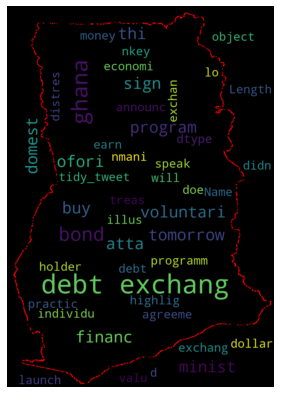

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def wc(df, title = None):
    wc = WordCloud(
        stopwords = stopwords,
        max_words = 2000,
        mask = ghana_mask,
        contour_width = 5, 
        contour_color = 'red',
        max_font_size = 110,
        background_color = 'black',
).generate(str(df))

    plt.figure(figsize=(12, 7))
    plt.axis('off')        
    plt.imshow(wc, interpolation = 'bilinear')
    plt.show()

wc(df['tidy_tweet'])

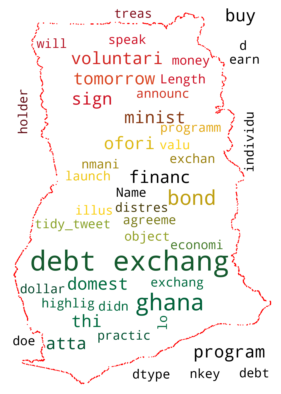

AttributeError: ignored

In [ ]:
from wordcloud.color_from_image import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def wc1(df, title = None):
    wc1 = WordCloud(
        stopwords = stopwords,
        max_words = 2000,
        mask = ghana_mask,
        contour_width = 5, 
        contour_color = 'red',
        background_color = 'white',
).generate(str(df))
    image_colors = ImageColorGenerator(ghana_mask)
    plt.figure(figsize=(12, 7))
    plt.axis('off')        
    plt.imshow(wc1.recolor(color_func = image_colors), interpolation = 'bilinear')
    plt.show()
wc1(df['tidy_tweet'])

In [ ]:
uploaded = files.upload()

Saving flagmapgh.png to flagmapgh.png


In [ ]:
gh_mask = np.array(Image.open("flagmapgh.png"))

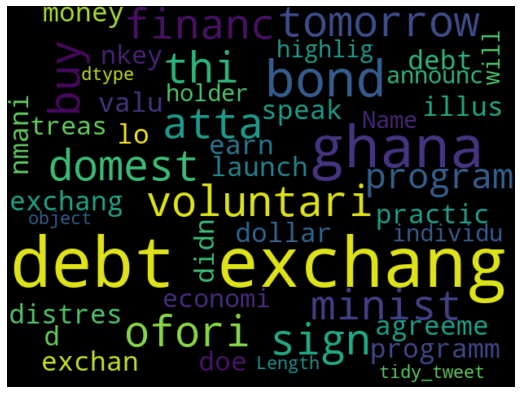

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def wc2(df, title = None):
    wc2 = WordCloud(
        stopwords = stopwords,
        max_words = 2000,
        mask = gh_mask,
        contour_width = 5, 
        contour_color = 'red',
        max_font_size = 110,
        background_color = 'black',
).generate(str(df))

    plt.figure(figsize=(12, 7))
    plt.axis('off')        
    plt.imshow(wc2, interpolation = 'bilinear')
    plt.show()

wc2(df['tidy_tweet'])